## 7. Interactivity: Selections

*Note: for this notebook make sure you select the same kernel session where you imported the booking and customer data*

Let's return to our simple interactive scatter plot from earlier, and take a look at the other types of interactivity that Altair offers:

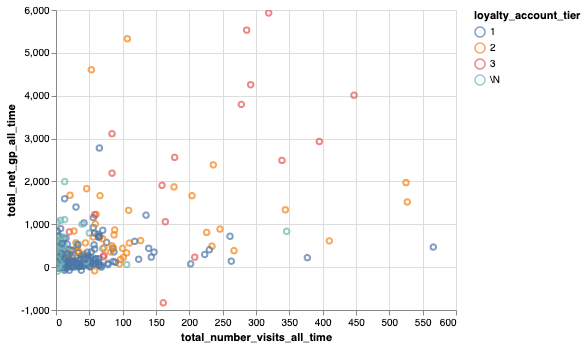

In [128]:
alt.Chart(cas_sample_df).mark_point().encode(
    x='total_number_visits_all_time',
    y='total_net_gp_all_time',
    color='loyalty_account_tier'
).interactive()

In [ ]:
cas_sample_df.info()

Altair provides a general selection API for creating interactive plots; for example, here we create an interval selection:

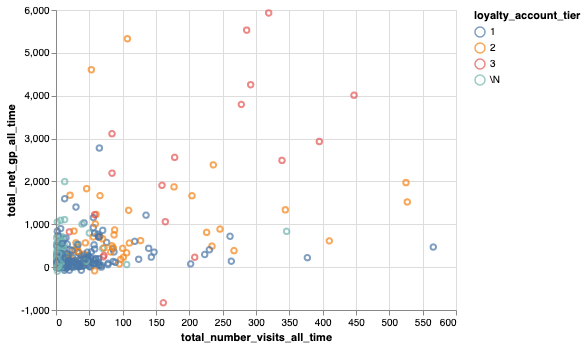

In [130]:
interval = alt.selection_interval()

alt.Chart(cas_sample_df).mark_point().encode(
    x='total_number_visits_all_time',
    y='total_net_gp_all_time',
    color='loyalty_account_tier'
).properties(
    selection=interval
)

Currently this selection doesn't actually do anything, but we can change that by conditioning the color on this selection:

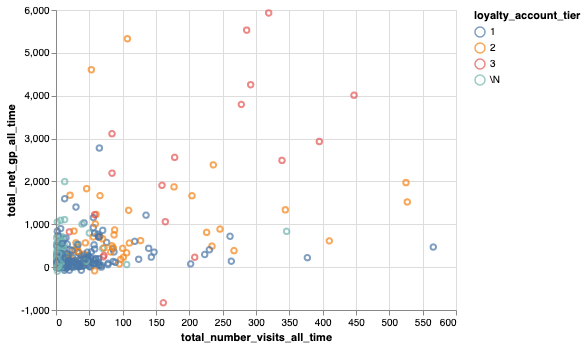

In [131]:
interval = alt.selection_interval()

alt.Chart(cas_sample_df).mark_point().encode(
    x='total_number_visits_all_time',
    y='total_net_gp_all_time',
    color=alt.condition(interval, 'loyalty_account_tier', alt.value('gray'))
).properties(
    selection=interval
)

The selection API automatically applies across compound charts. Here we can horizontally concatenate two different charts, and since they both have the same selection they both respond appropriately:

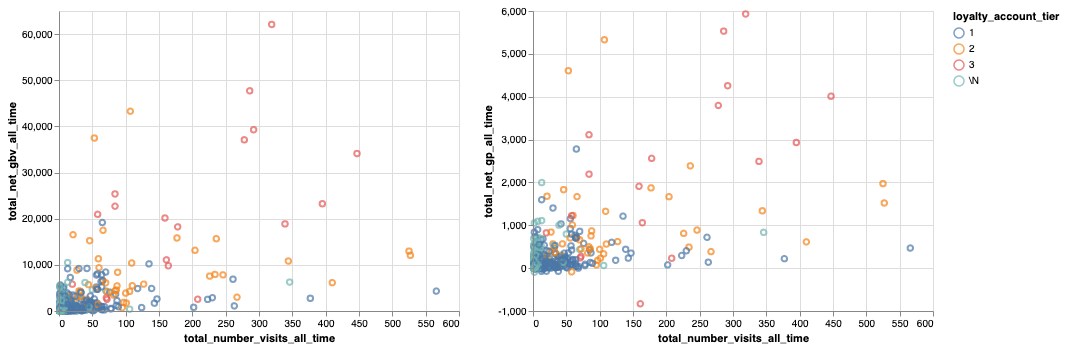

In [136]:
interval = alt.selection_interval()

scatter = alt.Chart(cas_sample_df).mark_point().encode(
    x='total_number_visits_all_time',
    color=alt.condition(interval, 'loyalty_account_tier', alt.value('gray'))
).properties(
    selection=interval
)

scatter.encode(y='total_net_gbv_all_time') | scatter.encode(y='total_net_gp_all_time')

We can do even more sophisticated things with selections as well. For example, let's make a stacked histogram of the number of customers by loyalty tier, and concatenate it a 3D scatterplot:

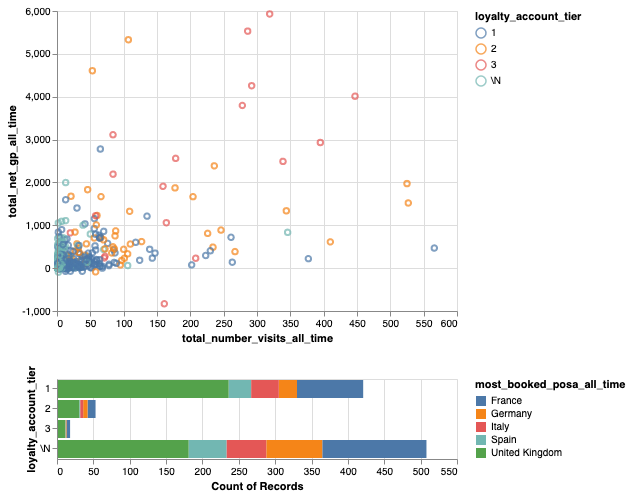

In [139]:
interval = alt.selection_interval()

scatter = alt.Chart(cas_sample_df).mark_point().encode(
    x='total_number_visits_all_time',
    y='total_net_gp_all_time',
    color=alt.condition(interval, 'loyalty_account_tier', alt.value('gray'))
).properties(
    selection=interval
)

hist = alt.Chart(cas_sample_df).mark_bar().encode(
    x='count()',
    y='loyalty_account_tier',
    color='most_booked_posa_all_time'
).transform_filter(
    interval
)

(scatter & hist).resolve_scale(color='independent')

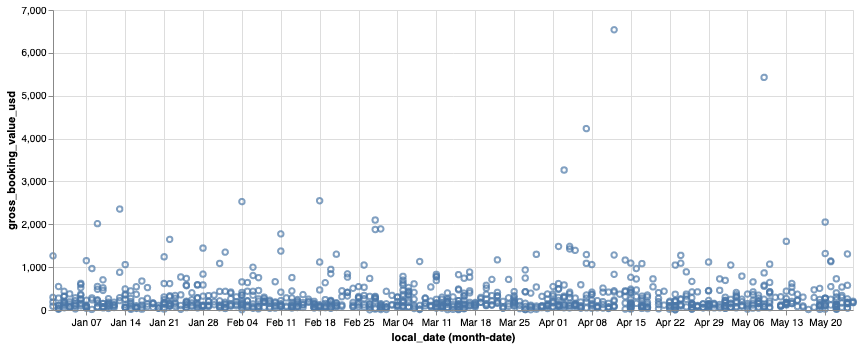

In [140]:
alt.Chart(bkg_sample_df).mark_point().encode(
    x=alt.X('local_date:T', timeUnit='monthdate'),
    y='gross_booking_value_usd',
    tooltip=['booking_itin_number', 'customer_account_id']
).properties(
    width=800
)

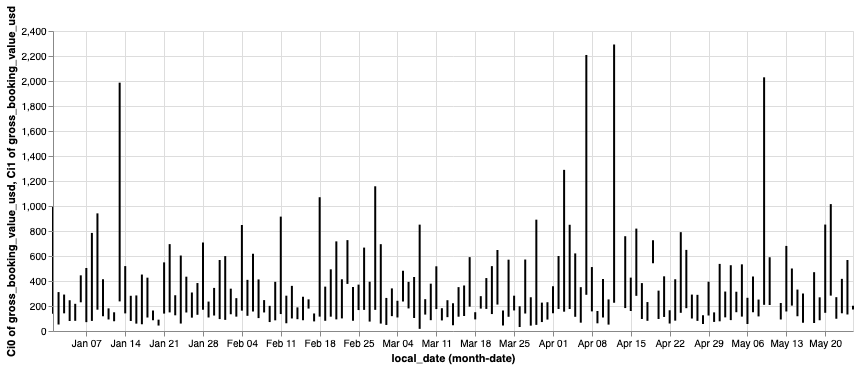

In [141]:
base = alt.Chart(bkg_sample_df).mark_rule(size=2).encode(
    x=alt.X('local_date:T', timeUnit='monthdate'),
    y='ci0(gross_booking_value_usd)',
    y2='ci1(gross_booking_value_usd)'
).properties(
    width=800
)

base

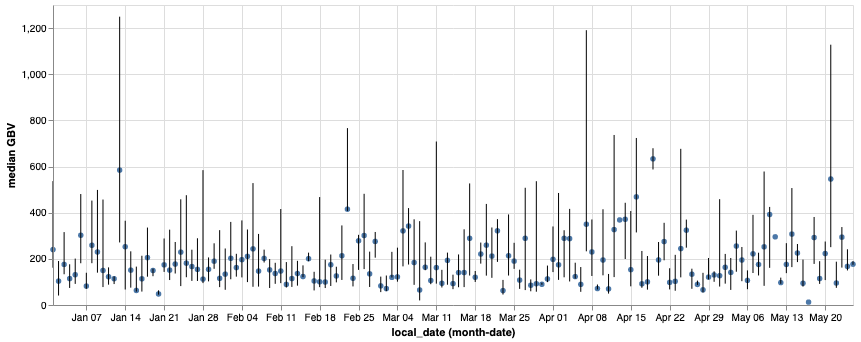

In [142]:
points = alt.Chart(bkg_sample_df).mark_point(filled=True).encode(
    x=alt.X('local_date:T', timeUnit='monthdate'),
    y=alt.Y('median(gross_booking_value_usd)', title='median GBV')
    #y='ci0(gross_booking_value_usd)',
    #y2='ci1(gross_booking_value_usd)'
).properties(
    width=800
)

confs = alt.Chart(bkg_sample_df).mark_rule().encode(
    x=alt.X('local_date:T', timeUnit='monthdate'),
    y='q1(gross_booking_value_usd)',
    y2='q3(gross_booking_value_usd)'
).properties(
    width=800
)

base = points + confs
base

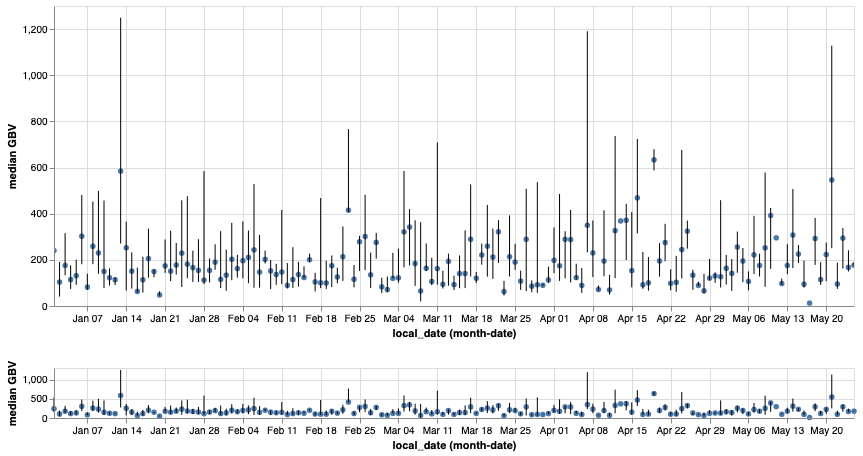

In [143]:
interval_points = alt.selection_interval(encodings=['x'])
interval_confs = alt.selection_interval(encodings=['x'])

view_select = points.properties(
    height=50,
    selection=interval_points
)

view_zoom_points = points.encode(
    x=alt.X('local_date:T', timeUnit='monthdate', scale=alt.Scale(domain=interval_points.ref()))
)

view_zoom_confs = confs.encode(
    x=alt.X('local_date:T', timeUnit='monthdate', scale=alt.Scale(domain=interval_points.ref()))
)

view_zoom_points + view_zoom_confs & view_select + confs